In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


# Construct some test data
x, y = np.ogrid[-np.pi:np.pi:100j, -np.pi:np.pi:100j]
r = np.sin(np.exp((np.sin(x)**3 + np.cos(y)**2)))

# Find contours at a constant value of 0.8
contours = measure.find_contours(r, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(r, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import measure
from skimage import feature
from skimage.util import invert
from skimage.morphology import convex_hull_image

def load_2d_image(image_url):
    img = io.imread(image_url)
    return rgb2gray(img)

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/251.png"

image = load_2d_image(image_url)



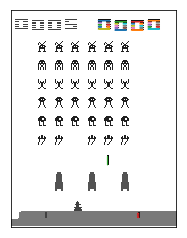

In [4]:
image_temp = image
image_temp = invert(image)

contours = measure.find_contours(image_temp, 0.5)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(image_temp, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
#contour = contours[65]
#ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])

plt.show()



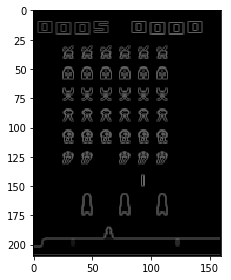

In [5]:
from skimage import data, io, filters

image_temp = image
edges = filters.sobel(image_temp)
io.imshow(edges)
io.show()



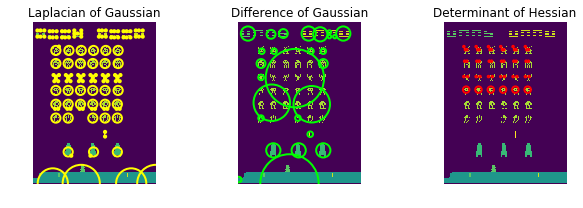

In [6]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()


/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0.18489683823529413


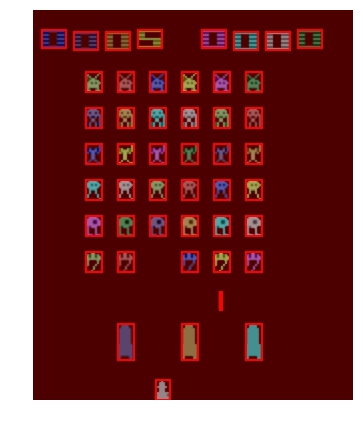

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io, color

from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

def load_2d_image(image_url):
    img = io.imread(image_url)
    return rgb2gray(img)

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/251.png"

image = load_2d_image(image_url)
image = image[0:195,0:160]

image = resize(image, (image.shape[0] * 2, image.shape[1] * 2),
                       anti_aliasing=True)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
# bw = image <= thresh
print(thresh)

# remove artifacts connected to image border
cleared = bw #clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    # print(region.bbox)
    if region.area >= 10:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

CPU times: user 14.2 ms, sys: 0 ns, total: 14.2 ms
Wall time: 14 ms


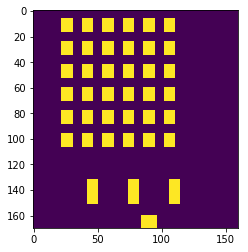

In [21]:
%%time

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io, color
from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.draw import rectangle

image_url = "/media/andres/Data/spaceinvaders/atari_v1/screens/spaceinvaders/1/1.png"

image = load_2d_image(image_url)
image = image[25:195,0:160]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))
cleared = bw
label_image = label(cleared)

for region in regionprops(label_image):
    if region.area >= 10:
        minr, minc, maxr, maxc = region.bbox
        rr, cc = rectangle(start=(minr, minc), end=(maxr, maxc), shape=cleared.shape)
        cleared[rr, cc] = 1

        
plt.imshow(cleared)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import *
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image_url = "/media/andres/Data/pinball/atari_v1/screens/pinball/1/250.png"

image = load_2d_image(image_url)
image = image[25:195,0:160]

#image = resize(image, (image.shape[0] * 2, image.shape[1] * 2),
#                       anti_aliasing=True)

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(1))
# bw = image <= thresh

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    # print(region.bbox)
    if region.area >= 5 and region.area <= 8:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
plt.imshow(cleared)

In [16]:
import random

import torch
from   torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from   torchvision import datasets, transforms


class AutoEncoder(nn.Module):
    
    def __init__(self, code_size):
        super().__init__()
        self.code_size = code_size
        
        # Encoder specification
        self.enc_cnn_1 = nn.Conv2d(3, 10, kernel_size=5)
        self.enc_cnn_2 = nn.Conv2d(10, 20, kernel_size=5)
        self.enc_linear_1 = nn.Linear(160, 50)
        self.enc_linear_2 = nn.Linear(50, self.code_size)
        
        # Decoder specification
        self.dec_linear_1 = nn.Linear(self.code_size, 160)
        self.dec_linear_2 = nn.Linear(160, IMAGE_SIZE)
        
    def forward(self, images):
        code = self.encode(images)
        out = self.decode(code)
        return out, code
    
    def encode(self, images):
        code = self.enc_cnn_1(images)
        code = F.selu(F.max_pool2d(code, 1))
        
        code = self.enc_cnn_2(code)
        code = F.selu(F.max_pool2d(code, 1))
        
        code = code.view([images.size(0), -1])
        code = F.selu(self.enc_linear_1(code))
        code = self.enc_linear_2(code)
        return code
    
    def decode(self, code):
        out = F.selu(self.dec_linear_1(code))
        out = F.sigmoid(self.dec_linear_2(out))
        out = out.view([code.size(0), 3, IMAGE_WIDTH, IMAGE_HEIGHT])
        return out
    


IMAGE_WIDTH = 30
IMAGE_HEIGHT = 22
IMAGE_SIZE = IMAGE_WIDTH * IMAGE_HEIGHT

# Hyperparameters
code_size = 20
num_epochs = 1
batch_size = 128
lr = 0.002
optimizer_cls = optim.Adam

# Load data
train_data = AtariImagesDataset('/media/andres/Data/mspacman/atari_v1/screens/mspacman/8',
                                transform=transforms.ToTensor())
test_data  = AtariImagesDataset('/media/andres/Data/mspacman/atari_v1/screens/mspacman/10',
                                transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, 
                                           batch_size=batch_size, num_workers=4, 
                                           drop_last=True)

# Instantiate model
autoencoder = AutoEncoder(code_size)
loss_fn = nn.BCELoss()
optimizer = optimizer_cls(autoencoder.parameters(), lr=lr)

# Training loop
for epoch in range(num_epochs):
    print("Epoch %d" % epoch)
    
    for i, images in enumerate(train_loader):    # Ignore image labels
        out, code = autoencoder(Variable(images))
        optimizer.zero_grad()
        loss = loss_fn(out, images)
        loss.backward()
        optimizer.step()
        
    print("Loss = %.3f" % loss.data[0])

# Try reconstructing on test data
test_image = random.choice(test_data)
test_image = Variable(test_image.view([1, 1, IMAGE_WIDTH, IMAGE_HEIGHT]))
test_reconst, _ = autoencoder(test_image)

torchvision.utils.save_image(test_image.data, 'orig.png')
torchvision.utils.save_image(test_reconst.data, 'reconst.png')

Epoch 0


/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


RuntimeError: size mismatch, m1: [128 x 6160], m2: [160 x 50] at /pytorch/aten/src/TH/generic/THTensorMath.cpp:2070

In [31]:
import os, os.path
from skimage.color import rgb2gray
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
from skimage.transform import rescale, resize

class AtariImagesDataset(Dataset):

    def __init__(self, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(self.root_dir)
        self.train_data = []
        for file in self.file_list:
            img_name = os.path.join(self.root_dir, file)
            image = io.imread(img_name)
            image = resize(image, (22, 30),
                       anti_aliasing=False)
            sample = image
        

            if self.transform:
                sample = self.transform(sample).float()

            self.train_data.append(sample)
            
    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.file_list[idx])
        image = io.imread(img_name)
        image = resize(image, (22, 30),
                       anti_aliasing=False)
        sample = image
        

        if self.transform:
            sample = self.transform(sample).float()

        return sample

In [32]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

train_data = AtariImagesDataset('/media/andres/Data/mspacman/atari_v1/screens/mspacman/8',
                                transform=torchvision.transforms.ToTensor())

EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
N_TEST_IMG = 5

/home/andres/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1569


TypeError: Invalid dimensions for image data

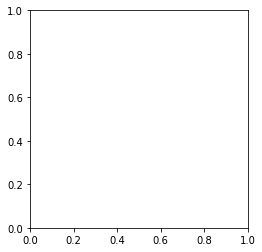

In [33]:
print(len(train_data.train_data))     # (60000, 28, 28)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

for epoch in range(EPOCH):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)

        encoded, decoded = autoencoder(b_x)

        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients

        if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()
